# Day 1

## Module 2

In this module you will learn how to load the online retail dataset in Python, visualise and summarise it to produce insights that will guide your machine learning endevours in the next modules. We will learn how to plot data and calculate summary statistics to build a dataset from which we ultimately will try to predict future customer behaviour.

### Learning Activity - Loading Libraries

First we need to load the required Python libraries. Libraries are like extensions to the base `python` that add functionality or help to make tasks more convenient to do. We will load some libraries that will boost your data handling capacity.

The main ones include `numpy` and `pandas`, which are the most prominent libraries to work efficiently with data in python. Here we just use the `import` function to, you guessed it import the pandas library and make it accessible `as` `pd` in the following code to save some typing (4 characters to be precise...). Then we load `matplotlib` and `seaborn` which are libraries that will help you to visualise the data. Visualisation of a dataset is key to getting a good understanding of what it is made before applying more involved machine learning algorithms. You will learn how handy it is to start formulating hypotheses and to evaluate output from data processing you will be doing.

In [1]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py

# Module 2
from sklearn.preprocessing import StandardScaler

# Module 3
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Additional plotting functionality 
from mpl_toolkits.mplot3d.axes3d import Axes3D 
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode()
%matplotlib inline

rng = np.random.RandomState(1)
# show 2 decimal places instead of a lot
pd.options.display.float_format = '{:.2f}'.format

print("libraries all imported, ready to go")

libraries all imported, ready to go


## The dataset

The dataset is from a online retailer selling gifts and is based on a dataset taken from [here](https://archive.ics.uci.edu/ml/datasets/Online+Retail#).

![Giftshop](img/giftshop.jpg)

It is a transaction history of an online shop and as we will load it into python we will see that it comes with a set of feature descriptions:

* `InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* `StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* `Description`: Product (item) name. Nominal.
* `Quantity`: The quantities of each product (item) per transaction. Numeric.
* `InvoiceDate`: Invice Date and time. Numeric, the day and time when each transaction was generated.
* `UnitPrice`: Unit price. Numeric, Product price per unit in sterling.
* `CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* `Country`: Country name. Nominal, the name of the country where each customer resides.

### Learning Activity - Loading the dataset

In a first step we load the dataset with `pandas`. To achieve this you will use the `.read_csv()` method. We just need to point to the location of the dataset and indicate under what name we want to store the data, i.e. `retail`, and `pandas` will do the rest. In the `read_csv()` function, the `parse_dates` parameter is a boolean or list of ints or names or list of lists or dict, which by default is set to False. In this case, we are passing the name 'InvoiceDate' that represents the corresponding column. More details on how to use `parse_dates` can be found http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html. 

At a first stage, the data has only been loaded. Let's have a look at the top few lines - we can use the `.head()` method to achieve this.

In [2]:
# Import the data and explore the first few rows

retail = pd.read_csv('data/online_retail.csv', parse_dates=['InvoiceDate'])

# shows the first few rows
retail.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.00,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.00,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.00,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.00,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.00,2010-12-01 08:26:00,3.39,17850,United Kingdom


*We already learned one thing, customer `17850` bought 6 `WHITE METAL LANTERN`s on the 1st of December in the early morning. Perhaps a Christmas present?*

It is also good practice to **always** check the dimensionality of the input data using the `shape` command to confirm that you really have imported all the data in the correct way and format (e.g. one common mistake is to get the separator wrong and end up with only one column).

In [3]:
# Check the dimensionality of the input data

# gives you the rows and then columns
print retail.shape

(219949, 8)


## Exploring the dataset

At this stage we do not really know what is going on in this dataset. We need to get beyond the first impression. How about trying to answer some simple questions like:

* How many customers are we dealing with?
* How many different products are being sold?
* What country spends how much?
* What has been the company's profit during the last year?
* What period does the data span?

We will go through these questions and learn new tricks as we move along. But before we get started, it is worth to have a little bit more background on what `pandas` is made of.

### Data selection with Pandas

Throughout this bootcamp you will be using `pandas` which is a python library that makes it muuuuuch more convenient to work with data than the base `python` methods. `pandas` is built on top of `numpy`, which is the library that brings efficient numerical operations to `python`. As the author of `pandas` Wes McKinney puts it: '*pandas provides high level data manipulation tools built on top of NumPy*'. `pandas` takes care of making it easy to work with tabular data in providing selections, merging, calculating statistics, filling in missing values and provides solutions to many other challenges that would be cumbersome to overcome with base `python`.

When you load data into python with `pandas` it is put into a special structure called a `DataFrame`. `DataFrame`s are what makes `pandas` so convenient to work with for data analysis. It is worth to take the time to understand what kind of an object a `DataFrame` is, or in other words what it is made of in order to get all the benefits it has on offer.

![Table Anatomy Class](./img/online_retail_table_anatomy.png)

You are familiar with what a table is, it has column and rows and often these are annotated with column labels and row labels respectively. But how are table encoded with `pandas`. The raw data is stored in `numpy` **arrays** and this is where `pandas` can leverage all the numerical data processing.

To add more convenient selection on top of this array, it is encoded in a so-called `pd.Series`, which can be thought of as a table with a single column. Crucially a `pd.Series` can have a (column) label and row labels. Also a `pd.Series` will store data of a given type, i.e. numbers, words, times. Row labels are called indexes in `pandas` and they are very important for a lot of `pandas` and we will introduce some later in the module. The `pd.Series` comes with many of the convenience functions that are included in `numpy`, such as `.sum()`, `.max()` etc. However, is has some additional functionality that `numpy` is missing. For instance it is very easy to count the unique number of entires in a pd.Series by simply using the `.nunique()` method.

Finally a bunch of `pd.Series` in one table constitute the `DataFrame`, with column labels and an index. Crucially, `DataFrame`s can have different types of data in different columns, which is essential when representing tables. Within a `DataFrame`, the different columns of the table can easily be accessed via the *name* of the columns. Similarly, you can select individual rows via the indices.

In this primer you will go though a lot of the basic pandas functionality and try to understand how they are build so it will be easier to maniputate them later.

### Learning Activity - How many?

Remember one of the questions from before? How many customers are we dealing with? Let's have a look.

First we need to select the `CustomerID` column, which we do with the square brackets (`[]`). This yields a `pd.Series` only containing `CustomerID` column. From this we can then count the unique values with the `.unique()` function that is conventiently provided for `pd.Series`.

In [4]:
# Apply the nunique() function on the column 'CustomerID'

print 'there are '+ str(retail['CustomerID'].nunique()) +' customers'

there are 3254 customers


In [71]:
for i in retail:
    print retail[i].dtype
    
print retail.columns.values

object
object
object
float64
datetime64[ns]
float64
int64
object
['InvoiceNo' 'StockCode' 'Description' 'Quantity' 'InvoiceDate' 'UnitPrice'
 'CustomerID' 'Country']


In [80]:
 for a in range(0,len(retail.columns)):
    print (str(retail.columns.values[a]) + ' and type: ' + str(retail[retail.columns.values[a]][2]))


InvoiceNo and type: 536365
StockCode and type: 84406B
Description and type: CREAM CUPID HEARTS COAT HANGER
Quantity and type: 8.0
InvoiceDate and type: 2010-12-01 08:26:00
UnitPrice and type: 2.75
CustomerID and type: 17850
Country and type: United Kingdom


In [56]:
print retail.head()

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER      6.00   
1    536365     71053                  WHITE METAL LANTERN      6.00   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER      8.00   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE      6.00   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.      6.00   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  


#### Test Activity 

Let's repeat this to find out how many countries the customers are from.

In [251]:
# Apply the nunique() function on the column 'Country'
print 'there are '+ str(retail['Country'].nunique()) +' countries'

there are 11 countries


We can also find out how many different products the shop is keeping.

In [252]:
# Apply the nunique() function on the column 'StockCode'
print 'there are '+ str(retail['StockCode'].nunique()) +' SKUs'

there are 3392 SKUs


#### Bonus Activity

Perhaps you have noticed that repeating the same operation again and again can become annoying. Let's be more efficient here.

The remedy is `pandas`' `.apply()` method, which allows you to apply a function on all the columns with a one line command. To do this we need to just select `retail` `Dataframe` and specify what function we want to apply. Before we were always using the `.nunique()` method, so let's do the same. In this context you need to be a bit more precise on where that function is form. As mentioned before, the `.nunique()` method works on pd.Series and that is how you will find it under `pd.Series.nunique`.

In [253]:
# Find the count of unique values for all the columns using the apply() function

print retail.apply(pd.Series.nunique)

InvoiceNo      13075
StockCode       3392
Description     3518
Quantity         439
InvoiceDate    12248
UnitPrice        273
CustomerID      3254
Country           11
dtype: int64


The `apply()` function will automatically go through all the columns and return the number of unique values in each column. We will be relying on the `.apply()` method later on when we calculate features from the dataset.

### Learning Activity - A customer's basket

You should have a look at a transaction in more detail to see how it is structured. Let's say we were interesting in having a closer look at the invoice with `InvoiceNo` `544182`. How would you filter just the rows of the `retail` table that has records on that specific invoice?

To do this we need to learn how to filter the dataset with `pandas`. The syntax for filtering is a bit cumbersome but it makes a lot of sense once you get the hang of it. To get it you need to understand that you can select from a `pd.DataFrame` in providing a `pd.Series` of `True` and `False` values. When doing so, `pandas` will only return the rows of the `pd.DataFrame` where `pd.Series` was True and will discard the rest.

Thus filtering a table is a two step process: 

* you build a `pd.Series` that indicates the rows that fit your condition
* then you select these rows from the original data frame.

In [254]:
# Filter out and display the rows for the invoice number 544182

invoice = retail[retail['InvoiceNo'] == '544182']

print invoice

      InvoiceNo StockCode                          Description  Quantity  \
57014    544182    85099B              JUMBO BAG RED RETROSPOT     20.00   
57015    544182     22957  SET 3 PAPER VINTAGE CHICK PAPER EGG     18.00   
57016    544182     22502           PICNIC BASKET WICKER SMALL     24.00   
57017    544182     22501           PICNIC BASKET WICKER LARGE      6.00   
57018    544182     22607          WOODEN ROUNDERS GARDEN SET       4.00   
57019    544182     22961               JAM MAKING SET PRINTED     24.00   
57020    544182     22960             JAM MAKING SET WITH JARS     18.00   
57021    544182     22722    SET OF 6 SPICE TINS PANTRY DESIGN     12.00   
57022    544182     22993         SET OF 4 PANTRY JELLY MOULDS     24.00   
57023    544182     22720    SET OF 3 CAKE TINS PANTRY DESIGN      21.00   
57024    544182     22969         HOMEMADE JAM SCENTED CANDLES     48.00   
57025    544182     22913          RED COAT RACK PARIS FASHION      6.00   
57026    544

Filtering can also be used to select for rows that are in a give numberic range. For instance try to filter the `invoice` `DataFrame` for just those items with a `UnitPrice` above £5.

In [255]:
# Filter out all invoices where the 'UnitPrice' is above 5

invoiceabove5 = invoice[invoice['UnitPrice'] > 5]

invoiceabove5

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
57016,544182,22502,PICNIC BASKET WICKER SMALL,24.00,2011-02-16 15:13:00,5.95,18257,United Kingdom
57017,544182,22501,PICNIC BASKET WICKER LARGE,6.00,2011-02-16 15:13:00,9.95,18257,United Kingdom
57018,544182,22607,WOODEN ROUNDERS GARDEN SET,4.00,2011-02-16 15:13:00,9.95,18257,United Kingdom


#### Test Activity

How much did the customer spend in total? From our dataset two columns will be very helpful to calculate the total send, i.e. `Quantity`, the number of items that were bought and `UnitPrice`, the amount each item cost. If we multiply these columns with each other we get how much the customer spent per item type and we only need to sum up the cost for all items.

Let's start with the total price per item. With `pandas` this is straight forward as we can simply select columns and multiply them with each other. Make sure to store the resulting `pd.Series` in a variable. Then we calculate the sum of all the item prices using the `pandas` method `.sum()`; remember that we can do this because the data is stored in a `pd.Series`.

In [256]:
# Start by multiplying the invoices' 'Quantity' by the 'UnitPrice' and then sum everything up with .sum()
revenue = invoice['Quantity'] * invoice['UnitPrice']

revenue.sum()

847.55

In [257]:
#another way of doing it
sum([invoice['Quantity'] * invoice['UnitPrice']]).sum()

847.55

There we go, this customer spent a total of £850 in this invoice.

What is the total turnover of the retail store. In essance it is the same calculation, but be careful to use the right `pd.Dataframe`.

In [258]:
# Calculate the total turnover of the retail store 
turnover = retail['Quantity'] * retail['UnitPrice']
turnover.sum()

11700339.96

### Learning Activity - A customer's history

Knowing the total spend for one invoice is good, but this will not teach us much about this customer in general. Let's also look at all the transactions of that customer (`CustomerID` `18257`).

You will first have to select all the rows in the table that are associated with the customer vis the `CustomerID` column.

In [259]:
# Filter out and display the rows for the customer 18257
customer_hist = retail[retail['CustomerID'] == 18257]

print customer_hist.apply(pd.Series.nunique)

InvoiceNo       8
StockCode      66
Description    68
Quantity       24
InvoiceDate     8
UnitPrice      23
CustomerID      1
Country         1
dtype: int64


How many purchases did this customer do? You should be able to do this with what we learned before.

In [260]:
# Get the number of unique invoices for the customer

customer_hist['InvoiceNo'].nunique()

8

Let's calculate the total spent for purchase (invoice) '563569' of this customer.

In [261]:
# Filter out the invoices with InvoiceNo equal to '563569'
this_invoice = customer_hist[customer_hist['InvoiceNo'] == '563569']

# Find the product cost 
invoice_revenue = this_invoice['Quantity'] * this_invoice['UnitPrice']

# Calculate the total cost
sum(invoice_revenue)

1946.27

We can see that repeating these operations can become quite cumbersome. We should write a function!

### Lesson 2 - Writing simple functions

`python` contains a whole range of predefined functions that makes is so useful, and we have been using some. Missing functionality is quickly added when loading libraries and so far we have mostly relied on such functions. Here we will learn how to write our own simple functions that help us to simplify our tasks.

Here is some simple pseudo code of a function. Generally speaking a function will take some input, for example some `data` on which it performs an operation. In this case the simple `.sum()`.

In [262]:
# 'def' defines the function where simple_sum is its name and data is a parameter

def simple_sum(data):
    output = data.sum()  # here the body of the function starts and its operation is performed
    return output  # finally the function needs to return the output

At this stage we have defined the function. In order to use it, we need to call it in a way that should be very familiar to you already.

In [263]:
# Call the 'simple_sum' function specifying the 'data' parameter

simple_sum(this_invoice['UnitPrice'])

132.62

This function is very simple and pointless really as we could simply have done `invoice['UnitPrice'].sum()`. However you can change the crucial part of the function to anything you like, i.e. the portion where we perform an operation on the data.

In this way functions offer you to extend the functionality of python. Remeber until now you have been using many predefined python functions that made your life easier. The functions that you will write in the follwing exercises are for exactly the same purpose, to make your life easier.

### Learning Activity - A customer's history at high throughput

What if we want to know the total spent by the customer for each purchase in a more systematic way? So far we had to repeat this operation for every purchase of the customer. This will be a two step process:

* first we group the data on a per-invoice-basis
* then we apply a function that calculates the total spend per group

This is a very commonly used framework to calculate summary statistics from data. In the following part of the notebook, we will apply this strategy to calculate the summary statistics for the total spent per invoice, and per country and per time period.

For the grouping, we can use a very handy function of `pandas` allows to go though the data on a per-invoices basis. Enter the `.groupby()` method.

![Group by operation](./img/online_retail_groupby.png)

#### Groupby InvoiceNo
The group `.groupby()` call is very simple, we just need to specify the column that we would want to group by. In this case it is the `InvoiceNo` (Note: you can also group by multiple columns and we will see that a bit later on).

In [264]:
# Group the customers history by its 'InvoiceNo's and display the output
grouped_customer_history = customer_hist.groupby('InvoiceNo')
grouped_customer_history.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
57014,544182,85099B,JUMBO BAG RED RETROSPOT,20.00,2011-02-16 15:13:00,1.95,18257,United Kingdom
57015,544182,22957,SET 3 PAPER VINTAGE CHICK PAPER EGG,18.00,2011-02-16 15:13:00,2.95,18257,United Kingdom
57016,544182,22502,PICNIC BASKET WICKER SMALL,24.00,2011-02-16 15:13:00,5.95,18257,United Kingdom
57017,544182,22501,PICNIC BASKET WICKER LARGE,6.00,2011-02-16 15:13:00,9.95,18257,United Kingdom
57018,544182,22607,WOODEN ROUNDERS GARDEN SET,4.00,2011-02-16 15:13:00,9.95,18257,United Kingdom
60547,C544635,22993,SET OF 4 PANTRY JELLY MOULDS,-12.00,2011-02-22 11:03:59,1.25,18257,United Kingdom
60548,544636,22933,BAKING MOULD EASTER EGG MILK CHOC,36.00,2011-02-22 11:05:00,2.95,18257,United Kingdom
129989,553418,23191,BUNDLE OF 3 RETRO EXERCISE BOOKS,60.00,2011-05-17 10:09:59,1.65,18257,United Kingdom
129990,553418,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,36.00,2011-05-17 10:09:59,1.65,18257,United Kingdom
129991,553418,23082,SET 6 PAPER TABLE LANTERN HEARTS,24.00,2011-05-17 10:09:59,3.75,18257,United Kingdom


In the background the `InvoiceNo` column was converted into a sorted index.

#### Apply the function

After grouping we can then apply an operation to each to and `.apply()`. Let's first write a simple function that calcualtes the total spent, inspired with what we have already done in a previous learning activity.

We first need to define the functions with...

    def total_spend(data):
        ---> operation goes here <---
        return pd.Series({'column_name': column_values)
    
...where `data` is the data input and we `return` a `pd.Series` where we have set a `column_name` (Note: You could also simply return the the `column_values` without passing them in a `pd.Series` object, but then you would lose the option to give a `column_name`).

Your task now is just to build a function that fits in here.

In [265]:
# Define a function called 'total_spent' that takes 'data' as a parameter
# where the operation calculates the amount spent per product. Remember
# that you can do 'Quantity' time 'UnitPrice'). Finally '.sum()' the output
# and return it as a pd.Series.

def total_spent(data):
    product_spend = data['Quantity'] * data['UnitPrice']
    total_spent   = product_spend.sum()
    return pd.Series({'total_spent': total_spent})

At this stage we have defined the function and it hosts exactly the same operation as in a previous learning function, with the only difference that it is contained withing a neat function.

We can now `.apply()` it to our grouped `pd.DataFrame`.

![Apply the total_spent function](img/online_retail_apply_total_spent.png)

In [266]:
# Apply the total_spent() function on the grouped customers
customer_spent = grouped_customer_history.apply(total_spent)
# Reset the index
customer_spent = customer_spent.reset_index()
# Display the first few rows
customer_spent.head()

,InvoiceNo,total_spent
0,544182,847.55
1,544636,106.20
2,553418,1023.74
3,557961,488.65
4,563569,1946.27


As you can confirm from above where you calculated the two invoices (namely `544182` and `563569`), we get the same results. Crucially, we now have all the customer's total spends and we even know how many times the customer instigated a purchase. The result is presented in a neat pd.Series.

We can still do better in resetting the index that was set during the `.groupby()`.

#### Bonus activity

Can you sort the output of the `pd.DataFrame`, to make the table easier to read?

In [267]:
# Sort the values of total_spent in an increasing order
customer_spent.sort_values('total_spent', ascending=False)


,InvoiceNo,total_spent
4,563569,1946.27
2,553418,1023.74
0,544182,847.55
3,557961,488.65
1,544636,106.20
7,C555268,-13.20
5,C544635,-15.00
6,C554152,-35.40


### Learning Activity - Tables to plots

Tables are a visual way (albeit primitive) to look into a dataset. There is much more that we can do to simplify getting insights from the data and to communicated it clearly to others.

We will be using the `seaborn` library for most plots in this bootcamp. It is based on the `python` classic `matplotlib`, which we loaded earlier. In a nutshell we define plot objects that can have a variety of properties, e.g. type of plots, dataset, data mapped to x-axis etc. Then we use `seaborn`'s helper functions that take care of most of the plotting setup to produce a graph where many reasonable presets have been set.

In this way there is a whole range of plot types that can be quickly produced. Have a look [here](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html) for a gallery of plots possible with `seaborn`.

![Seaborn gallery](img/seaborn_gallery.png)

Let's produce our first plot.

To do this we first initiate a figure object. Here we can set some parameters such as figure dimentsions, but there are many more to pick from [here](http://matplotlib.org/api/figure_api.html). At this stage we have an emply plot.

When we build a plot we need to ask yourself three things:

* What data do I want to plot?
* What type of plot is suited for the data?
* What aestetic (x- or y-axis, colour etc.) to I pick to reprent a given dimension of the data on the plot type?

The dataset is straightforward, it is the `total_spent` per invoice of a given customer. The a barplot is quite suitable and we call it with `sns.barplot()`. It comes with a few vary important parameters. The `data=` parameter is where we define the dataset that we want to plot and the `x=` and `y=` are the aestetics (or visual aides) of the plot where we **map** a choice of dimensions. Namely we want to have one bar per invoice, hence we split the `InvoiceNo` over the `x`-axis and we want the height of the bars to represent the `total_spent`.

Finally we print the plot with `plt.show()`.

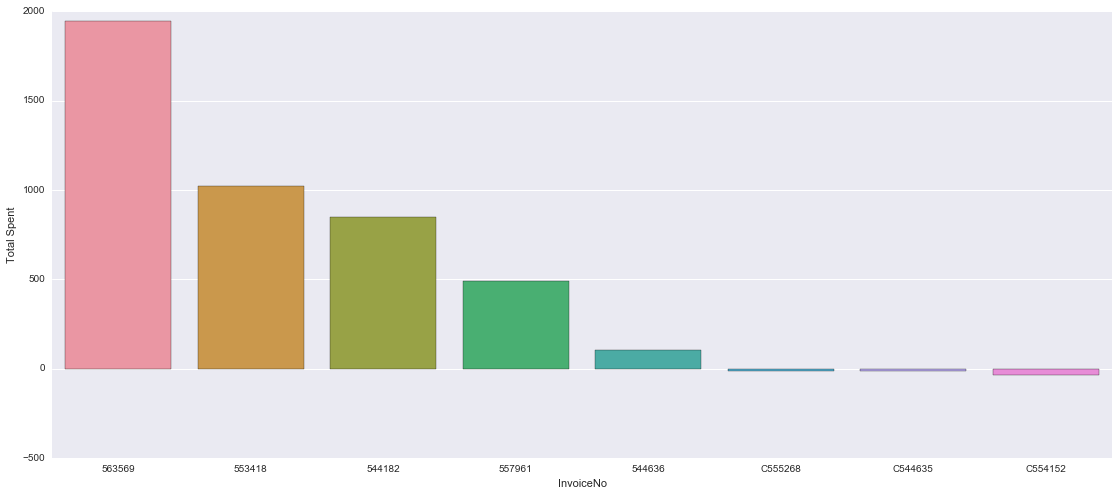

In [268]:
# Create the barplot of the total spent per invoice number
plt.figure(figsize=(19,8))
# the data attribute is the dataframe from which you pull the data from. x and y are a the columns you'll plot
ax = sns.barplot(x='InvoiceNo', y='total_spent', data=customer_spent.sort_values('total_spent', ascending=False))
ax.set(xlabel='InvoiceNo', ylabel='Total Spent')
plt.show()

#### Bonus activity

Try to order the bars when plotting them. You could again use the `.sort_values()` mehtod.


In [269]:
# Create the barplot of the total spent per invoice number using an increasing order
###### Done that above!!!! #####%%

#### Bonus Activity - Country spending

Let's what country is spending the most. Here again `.groupby()` will come in handy as well as the function `total_spent()` defined above.

In [270]:

# Perform group by country
grouped_retail_bycountry = retail.groupby('Country')

# Apply total spent in each grouped category
spent_by_country = grouped_retail_bycountry.apply(total_spent)

# Resetting index
spent_by_country = spent_by_country.reset_index()

# Sorting by total spent
spent_by_country = spent_by_country.sort_values('total_spent', ascending=False)
# Present the output
spent_by_country

,Country,total_spent
10,United Kingdom,10768034.92
4,Germany,323042.88
3,France,271056.43
8,Spain,95588.58
9,Switzerland,67074.33
1,Belgium,46162.11
6,Norway,34593.85
7,Portugal,33277.50
2,Finland,31051.81
5,Italy,19882.71


You can see that could easily reuse our function to produce a completely new result based on the same operation. The only thing we changed was the group - we grouped by `Country` instread of `InvoiceNo`.

Let's further clean up the result in converting the `Country` index into a column for more convenient plotting and let's sort the values to a clearer message.

Let's again use a barplot to visualise this data.

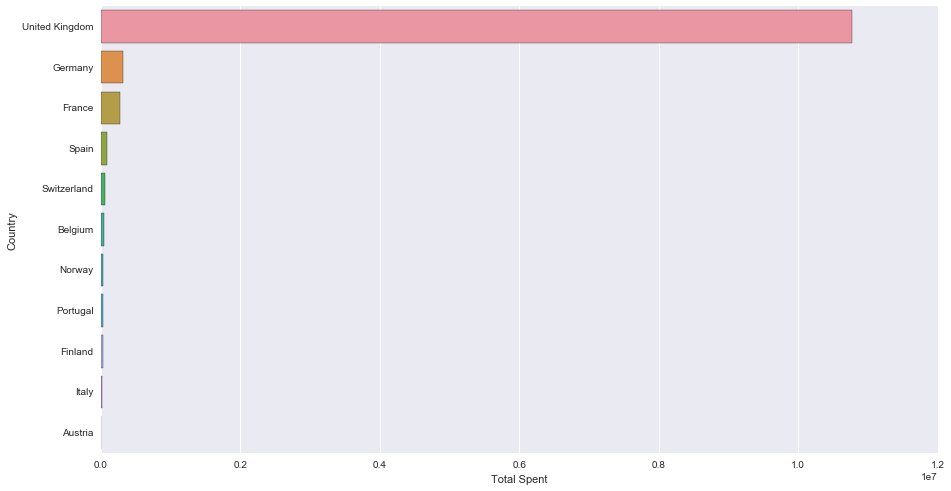

In [271]:
# Plot the total spent per country using a barplot 
# Create the barplot of the total spent per invoice number
plt.figure(figsize=(15,8))
# the data attribute is the dataframe from which you pull the data from. x and y are a the columns you'll plot
ax2 = sns.barplot(x='total_spent', y='Country', data=spent_by_country)
ax2.set(xlabel='Total Spent', ylabel='Country')
plt.show()

The plot above show that clearly most of the money is pent in the UK. Perhaps it would be a good idea to use a **log-scale** here to distinguish between the lower ranking countries.

In [272]:
# Repeat the plot by this time apply a log scale 

### Learning Activity - A history of  purchases

Up until now, you have learned a lot about the data, but we do not yet know much about what time period the dataset is spanning? To get an impression we have the `IncoiceDate` column to play with. At this point we can conveniently calculate the total_spend per time unit. Let's start with the time unit in which the data was loaded, simply on 'InvoiceDate'.

In [273]:
# Perform group by 'InvoiceDate'
retail_by_date = retail.groupby('InvoiceDate')

# Apply total spent in each grouped category
total_spent_by_date = retail_by_date.apply(total_spent)

# Display the some of the output
total_spent_by_date.head()


,total_spent
InvoiceDate,
2010-12-01 08:26:00,139.12
2010-12-01 08:28:00,22.20
2010-12-01 08:34:00,1263.29
2010-12-01 08:35:00,71.40
2010-12-01 08:45:00,2259.40


You see that the apply was performed on a minute basis, which might not be the most useful (and takes a bit of time). 

Let's calcualte the `total_spent` on a monthly basis. Notice that this time we can not reset the index (with `.reset_index()`) as we need the indexed form to apply the `.resample()` method, that allows to switch between time resolutions.

In [274]:
# Use the '.resample()' method from pandas with the 'M' parameter to collect
# the monthly total spend and '.sum()' it all up in one line
revenue_per_month = total_spent_by_date.resample('M').sum()
revenue_per_month = revenue_per_month.reset_index()
# Present the output
revenue_per_month

,InvoiceDate,total_spent
0,2010-12-31,1367597.91
1,2011-01-31,1028157.98
2,2011-02-28,987573.40
3,2011-03-31,1332488.44
4,2011-04-30,1060857.60
5,2011-05-31,1584375.55
6,2011-06-30,1483200.62
7,2011-07-31,1432452.22
8,2011-08-31,1423636.24



Let's plot this data. This time we will not use `seaborn` but a ususal suspect, that beyond making data maniplations more convenient (hint, hint), has been developed to work very well with timeseries data. You guess right, `pandas` comes with its own plotting functionality and it is ver easy to plot time series.

We simply use the `.plot()` method on the `pd.DataFrame` this time specifying that we want to use the index as our x-axis (remember, `seaborn` does not play well with `pandas` indices).

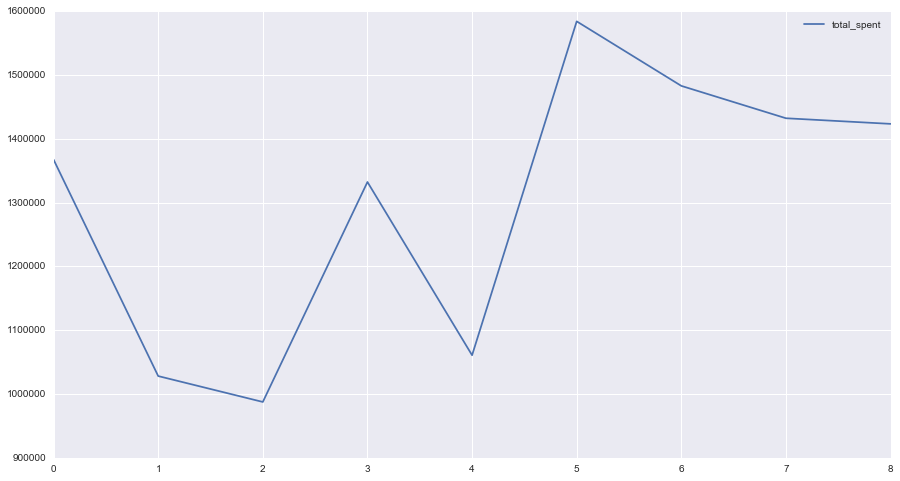

In [275]:
# Plot the total spent per month 
revenue_per_month.plot(use_index=True, figsize=(15,8))

We can see that our dataset spand a period from December 2010 to August 2011. We can also see that there are fluctuations over the year and also within the weeks probably suggesting particular spending patterns for weekend days.

#### Bonus Activity

Repeat the opeartion to get the `total_spent` on a daily basis.

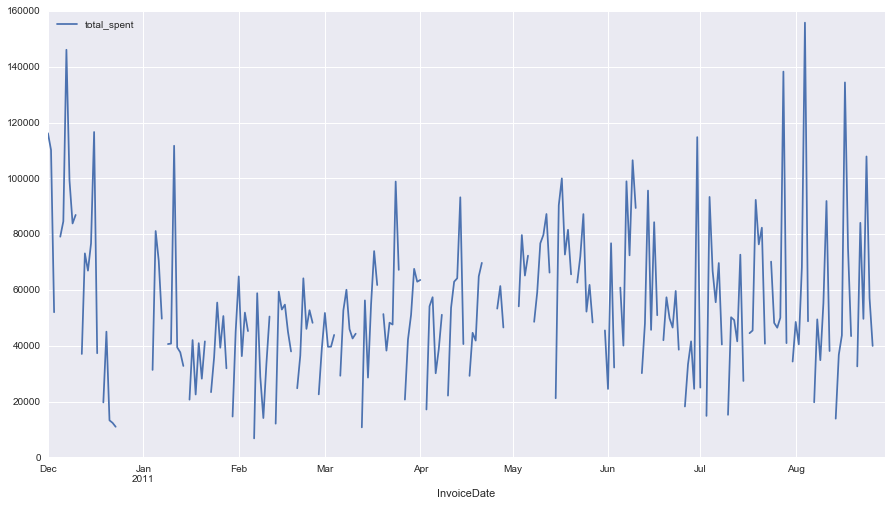

In [276]:

# Plot the total spent per day 
# '.resample()' with the 'D' parameter and .sum() up the results before plotting the time series with pandas

# Use the '.resample()' method from pandas with the 'M' parameter to collect
# the monthly total spend and '.sum()' it all up in one line
revenue_per_day = total_spent_by_date.resample('D').sum()
# Present the output
revenue_per_day.plot(use_index=True, figsize=(15,8))

What do you observe? 

## Building the dataset

We are now equipped with all the tools to build a dataset that summarised all the imporant information the intial dataset that you were given. It will help to systematically understand customer behaviour. In the next modules we will use the dataset that you generated to do customer segmentation and predictions to try and classify whether customers are likely to be returning to the online shop.

![Visual Representation of Dataset](img/online_retail_visual_table.png)

There will be a two step building process to the dataset:

* aggregation based on `InvoiceNo`
* aggregation based on `CustomerID`

![2-step Aggregation](img/online_retail_two_step_aggregation.png)

### Learning Activity - Summarise Invoices

You will start by summarising all the information contained in the invoices. To extract as much meaningful information as possible, you define custom functions that summarise different aspects of customer behaviour. This is a crucial step in any data science endvour and is called **feature engineering**.

Let's start with a function that we already know: `total_spent`. We will essentially re-use the same function as before, but we need to give it a little update. This time we will want to make sure that when we look at items purchases that they have a positive `Quantity` associated with them. We can achieve this by updating the functions operation to filter for rows in the `pd.DataFrame` where `Quantity > 0`.

In [277]:
# This is a slight modification to the total_spent function you built above

def total_spent(data):
    purchased = data[(data['Quantity'] > 0)]  # make sure to filter for rows where an item was sold (not returned)
    spent = purchased['Quantity'] * purchased['UnitPrice']
    return spent.sum()  # we sum up the sending per items and return the result

A further little tweak is concerned with the way that the function returns the computed feature. If you remember in the previous version of the function, we returned the result in a `pd.Series` object. This was so that we could assign a column name to the output. This time we want to just return the simple calculated values as we will let the naming be done by an additional convenience function, which single role is to build a neat final `pd.DataFrame` (see below).

But before we get into that, let's define some more features and functions that can caluclate them. It could be interesting to see how much customers have been refunded. This function will be very simular to the the `total_spent` and we can name it `total_refunded`. The single difference is that we are this time interested in the entries of the table where there was a negative `Quantity`.

In [278]:
# This function is very similar to the one above, except that it records
# the number of items that were returned (rather than sold)

def total_refunded(data):
    returned = data[(data['Quantity'] < 0)]
    refunded = returned['Quantity'] * returned['UnitPrice']
    return refunded.sum()

Another feature could be the total number of items purchases. This function will be called `total_items()` and operates in a similar way, except that it ignores `UnitPrice`s.

In [279]:
### TEST ACTIVITY ### 

# Define a function called 'total_items' that takes data as a parameter.
# It should filter all rows where the 'Quantity' is more than 0, i.e.
# where an item was sold (not returned). Then it should select the 
# 'Quantities' column and return the sum.

def total_items(data):
    n_items = data[(data['Quantity'] > 0)]['Quantity']
    return n_items.sum()

### WRITE YOUR CODE HERE ### 

Again the corresponding function that is concerned with refunded items can be quickly coded up.

In [280]:
# This function is very similar to the one you just write, except that it
# records the number of items that were returned (rather than sold)

def total_items_returned(data):
    n_items = data[(data['Quantity'] < 0)]['Quantity']
    return n_items.sum()

As mentioned above, all the functions defined will just return a `pd.Series` that does not have a name associated with it. That is there the `compute_invoice_metrics` functions comes in. This function is required because with the `.apply()` method in `pandas` we can only call a single function. `compute_invoice_metrics` is a trick to circumvent this limitation in that it is a single function that calls other functions as it is called. Furthermore it naming the output from the other functions and return the result per group in a `pd.Series` that is stiched up nicely to become the final `pd.DataFrame` that is output.

In [281]:
# These functions define what other functions (which we defined above) we want to 
# apply to the grouped dataset

def compute_invoice_metrics(data):
    result = {
        'total_spent': total_spent(data),
        'total_refunded': total_refunded(data),
        'total_items': total_items(data),
        'total_items_returned': total_items_returned(data)
    }
    return pd.Series(result)

With all the required functions defined, we can start with the processing. First we will group the data with a `.groupby()`. This time we will use multiple columns by which we want to group. (Note: Although we know that each invoice has a unique `InvoiceNo`, we also add other columns at this stage. This only way to keep these columns as additional output in the resulting table beyond the features that our custom functions calculate. We want to keep these columns are we need to use them in the next aggregation step when we produce more features on a **per-customer-basis**.) 

Then we apply the `compute_metrics()` function to the grouped table. (**Note: This can take some time!**)

In [282]:
# Group the invoices this time by multiple columns including
# all of 'InvoiceNo', 'InvoiceDate', 'CustomerID' and 'Country'.

retail_grouped = retail.groupby(['InvoiceNo','InvoiceDate','CustomerID', 'Country'])

# Apply the 'compute_invoice_metrics' you defined above
invoices = retail_grouped.apply(compute_invoice_metrics)
# Reset index
invoices = invoices.reset_index()
# Display the first rows

#### Bonus Activity

Can you design additional features that you think could be useful? Give it a go!

### Learning Activity - Summarise customers

You will now have a table where every row has a single `InvoiceNo` with various summaries or features associated with that number. However we are interested in better understanding our customers. So we need to apply a further summarising step to get to each row being a single `CustomerID`. Then we can learn behavioural aspects or customers.

This time you will calculate a time-based feature. To be specific you will learn every how may days a customer places an order. This function is a bit more involved as it has to deal with considerations that are specific to time data. The details do not matter here.

In [283]:
# This function records the time that has passed between two orders

def time_between_orders(data):
    t = data[(data['total_items'] > 0)]['InvoiceDate']  # filter for the rows where an item was sold (not returned)
    t = t.sort_values()  # make sure to sort values according to date
    try:
        timedelta = t - t.shift(1)  # shift by one row
        days = timedelta.astype('timedelta64[D]')  # convert to n. days
        days = days.mean()  # return the average time between orders (to aggregate in case there were many orders)
    except TypeError:
        days = np.NaN  # this covers the cases where there was only one purchase and we can not take a delta.
    return days

Again we have a summarising function `compute_customer_metrics()` that will be called with the `.apply()` to in turn call all the functions that actually calculate the features. This time we mostly `.sum()` up the individual invoices' totals to get to a value that reflect the customer as a whole. Features that we calculate on a per-customer-basis should include:

* total_spent
* total_refunded
* total_items
* total_items_returned
* min_spent
* mean_spent
* max_spent
* balance
* n_orders
* time_between_orders

Here you are provided with a skeleton of `compute_customer_metrics()` but it is incomplete. Add the `time_between_orders()` and also add the final `balance` per customer where it is defined as the `total_spent` - `total_refunded`.

In [284]:
# This function again defines what other functions we want to apply to the
# grouped dataset, this time on a per customer basis

def compute_customer_metrics(data):
    result = {
        'total_spent': data['total_spent'].sum(),
        'total_refunded': data['total_refunded'].sum(),
        'total_items': data['total_items'].sum(),
        'total_items_returned': data['total_items_returned'].sum(),
        'min_spent': data['total_spent'].min(),
        'mean_spent': data['total_spent'].mean(),
        'max_spent': data['total_spent'].max(),
        'balance': data['total_spent'].sum() + data['total_refunded'].sum(), 
 #       'first_order_date': data['InvoiceDate'].min(), #need to figure out how to skip this in the outlier function
        'n_orders': len(data),
        'time_between_orders': time_between_orders(data)  
    }
    return pd.Series(result)

Again you will group the dataset that you want to aggregate, which this time is the invoices `pd.DataFrame`. And finally you apply the `compute_customer_metrics()` function you defined and reset the indices. (Note: This can again take some time, but should be faster than the aggregation before)

In [285]:
# Group by Customer ID and Country
customer_summary = invoices.groupby(['CustomerID','Country'])

# Apply the compute_customer_metrics() function in the grouped instances
customer_summary = customer_summary.apply(compute_customer_metrics)

# Display the first rows
customer_summary.head()

,,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,Country,,,,,,,,,,
12346,United Kingdom,0.00,77183.60,38591.80,0.00,2.00,nan,74215.00,-74215.00,-77183.60,77183.60
12348,Finland,3874.60,2248.80,1291.53,478.80,3.00,54.50,6876.00,0.00,0.00,3874.60
12350,Norway,294.40,294.40,294.40,294.40,1.00,nan,196.00,0.00,0.00,294.40
12352,Norway,1845.13,1054.10,393.09,0.00,5.00,11.33,774.00,-63.00,-120.33,1965.46
12354,Spain,1079.40,1079.40,1079.40,1079.40,1.00,nan,530.00,0.00,0.00,1079.40


In [286]:
customer_summary[customer_summary['balance']== customer_summary['balance'].min()]
print(customer_summary.shape)

(3254, 10)


At last you have gone from an item-based table to an information rich customer-based table that you can now supply to unsupervised and supervised machine learning algorithms to try and learn something about the customers. 

There is just *one* more thing... *Quality control*. We can immediately see that for instance for the `time_between_orders` column we have some missing data as the `count` value is lower than that of the other columns.


### Learning Activity - Imputation

We should first take care to replace the missing values in the dataset as they prevent machine learning algorithms to run. There are many strategies to help with missing data and they depend on whether the missing data is numeric or categorical.

* simply removing rows where there is missing data (e.g. `.dropna()` can achieve this)
* imputing the values with a summary statistic such as mean or median or most frequent value (e.g. `Imputer` from `sklearn` module)
* replace the values with a resonable estimate

What strategy is best for you problem very much depends on the specifics of your dataset. However generally speaking it is not worth to remove large chunks of data.

In our case the missing values are exclusively found in the `time_between_orders` column, so we should have a look at these rows where this occurs.

In [287]:
# Find the instances where the time_between_orders is empty
nan_customers = customer_summary[pd.isnull(customer_summary['time_between_orders'])]
# How many nan cases do we have? 
print(nan_customers.shape)

(1368, 10)


Eyeballing the table we can see that only in the rows where we have a single order (`n_orders == 1`) that the `time_between_orders` is `NaN`, i.e. Not a Number. That makes immediate sense and indicates that these customers have not yet returned for anther purchase.

A reasonable strategy here would be to replace the `NaN` values by the longest time period (in days) that we would expect a customer to be returning, e.g. 365 days. So let's replace all the `NaN` values with the `pandas` method `.fillna()`.

In [288]:
# Take the empty values (NAs) from the column 'time_between_orders' and fill them with the value 365
customer_summary['time_between_orders'] = customer_summary['time_between_orders'].fillna(365)

### Learning Activity - Removing Outliers

Now let's move on to taking care of the blatant outliers. An outlier is an observation that appears extreme relative to the rest of the data. Some ML techniques are sensitive to outliers and it's better to remove these samples before proceeding.

There are again many strategies to deal with this scenario. The real question that we need to answer is at what point we consider a value extreme and whether it is really legitimate to remove it from the observations.

Here we have defined a simple function that provides for a straighforward way of removing observations that are `k` standard deviations (`sigma`) away from the mean (`mu`) of a distribution.

Assuming that the data is normally distributed, approximately 99.7% (almost everything) of the data falls within three standard deviations of the mean. Under this assumption we are considering as outliers only samples with very unlikely values for a features.

In [289]:
# This function defines what datapoints we consider 

def remove_outliers(data, k=3):
    mu = data.mean()  # get the mean
    sigma = data.std()  # get the standard deviation
    filtered_data = data[np.abs((data - mu) / sigma) < k]  # filter values based on distance from mean
    return filtered_data

You can `.apply()` this function. In case that the value is decalred an outlier, its value is replace by `NaN`, keeping the structure of the `pd.DataFrame` intact. However it only operates on numerical columns. Therefore, we first need to some `pd.DataFrame` processing.

In [328]:
# Apply the remove_outliers function to the customers dataframe and display the first few rows

customer_summary_clean = customer_summary.apply(remove_outliers)

customer_summary_clean.head()

,,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,Country,,,,,,,,,,
12346,United Kingdom,0.00,nan,nan,0.00,2.00,365.00,nan,nan,nan,nan
12348,Finland,3874.60,2248.80,1291.53,478.80,3.00,54.50,6876.00,0.00,0.00,3874.60
12350,Norway,294.40,294.40,294.40,294.40,1.00,365.00,196.00,0.00,0.00,294.40
12352,Norway,1845.13,1054.10,393.09,0.00,5.00,11.33,774.00,-63.00,-120.33,1965.46
12354,Spain,1079.40,1079.40,1079.40,1079.40,1.00,365.00,530.00,0.00,0.00,1079.40


Let's now remove the `NaN` values. This can easily be achieve with the `.dropna()` method that takes care of all the rows with a single occurence of `NaN` value.

In [329]:
# Remove NAs
customer_summary_clean = customer_summary_clean.dropna()
customer_summary_clean.head()

,,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,Country,,,,,,,,,,
12348,Finland,3874.60,2248.80,1291.53,478.80,3.00,54.50,6876.00,0.00,0.00,3874.60
12350,Norway,294.40,294.40,294.40,294.40,1.00,365.00,196.00,0.00,0.00,294.40
12352,Norway,1845.13,1054.10,393.09,0.00,5.00,11.33,774.00,-63.00,-120.33,1965.46
12354,Spain,1079.40,1079.40,1079.40,1079.40,1.00,365.00,530.00,0.00,0.00,1079.40
12356,Portugal,6621.63,5011.34,3310.81,1610.29,2.00,80.00,4455.00,0.00,0.00,6621.63


### Learning Activity - Scaling

Often when we are working with multidimensional data, the data have different units and thus exist on different scales. When comparing the data internally, or when the values map to similar space, then that is not a problem. However if a dimensions is in the millions, e.g. population of a country, and an others dimension in the few hundreds, e.g. number of hospitals, then there can be an uneven impact of the dimensions with higher values.

You can easily visualise this with a `boxplot`. `boxplot` represent essential statistics that describe distributions; from bottom to top, the horizontal lines of the box represent the first quartile (`Q1`), the median and third quartile (`Q3`). The distance between `Q1` and `Q3` is called inter quartile range (`IQR`). The whiskers of the boxes on the top and bottom are defined as `Q1 - 1.5 x IQR` and `Q3 - 1.5 x IQR` respectively.

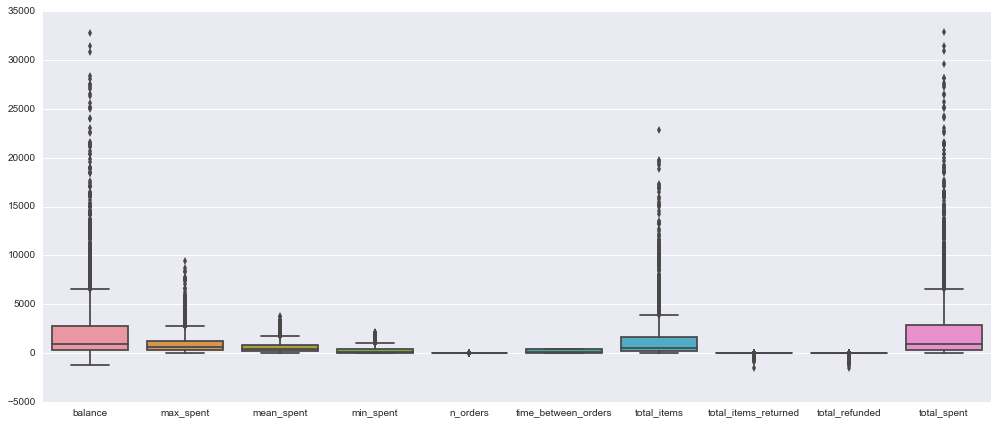

In [330]:
# Plot a sns.boxplot() of the customer dataframe
plt.figure(figsize=(17,7))
g = sns.boxplot(data=customer_summary_clean)
plt.show()

For instance you can see that `n_orders` is defined in a much narrower space than `balance`. If you were to use the data in an unscaled form, the effect of `balance` might be disproportionnaly high.

To account for this you can scale your data, so that all the dimensions fall onto the same space. We use a simple function from the `sklearn` library for this purpose. Namely we use the `StandardScaler()`. In the coming sections of the bootcamp we will be using `sklearn` extensively.

In [331]:
# Initialise the scaler
scaler = StandardScaler()  # OR scaler = MinMaxScaler()
# Apply auto-scaling (or any other type of scaling) and cast to DataFrame 
customer_summary_clean = pd.DataFrame(
    scaler.fit_transform(customer_summary_clean),
    columns = customer_summary_clean.columns,
    index = customer_summary_clean.index
)

# Print the first rows
customer_summary_clean.head()


,,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,Country,,,,,,,,,,
12348,Finland,0.38,1.25,1.43,0.51,-0.13,-0.87,2.26,0.18,0.25,0.38
12350,Norway,-0.56,-0.64,-0.57,0.02,-0.70,1.14,-0.52,0.18,0.25,-0.56
12352,Norway,-0.15,0.10,-0.37,-0.76,0.43,-1.15,-0.28,-1.05,-1.15,-0.12
12354,Spain,-0.35,0.12,1.01,2.11,-0.70,1.14,-0.38,0.18,0.25,-0.35
12356,Portugal,1.10,3.92,5.49,3.53,-0.42,-0.70,1.25,0.18,0.25,1.09


Let's replot the `boxplot`.

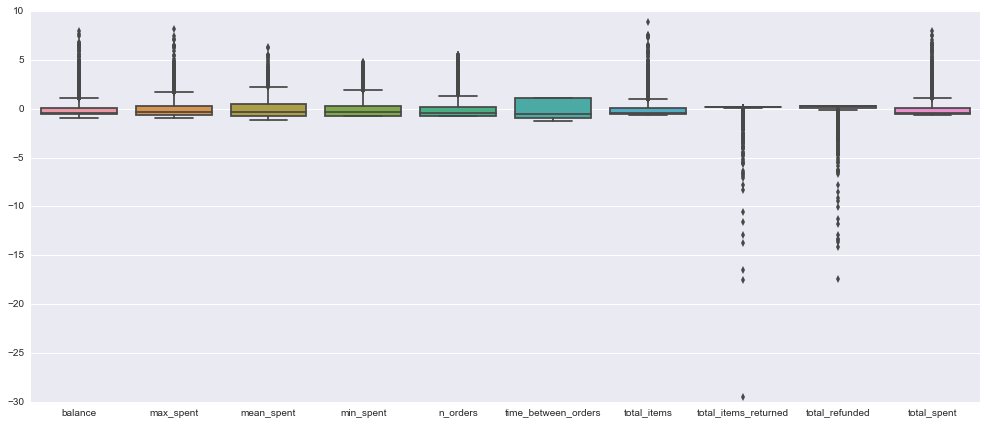

In [294]:
# Replot the boxplot with the scaled data
plt.figure(figsize=(17,7))
g = sns.boxplot(data=customer_summary_clean)
plt.show()


### Learning Activity - Investigate the relationship between input features

Visualisation is an integral part of Data Science. Exploratory data analysis (EDA) is the field dealing with the analysis of data sets as a means of summarising their main characteristics, most often using visual methods.

One of the most powerful tools commonly used as part of EDA is the scatter plot. This step helps visualise the relationship in-between two input features, indicates the degree of correlation plus helps reveal any patterns and trends in the data, and may also give you a first indication of the ML model that could be applied and its complexity (linear vs. non-linear). 

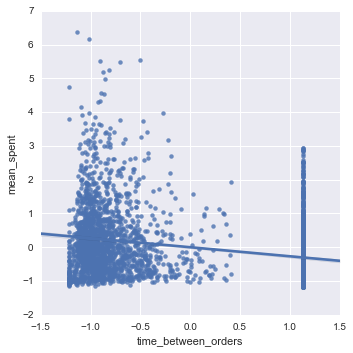

In [295]:
# Create a scatter plot of the first two features 'balance' vs. 'total_spent'
ax = sns.lmplot(x='time_between_orders', y='mean_spent', data=customer_summary_clean, fit_reg=True)
plt.show()

### Test Activity - Create a scatterplot of different features

Try once more creating an enhanced scatterplot as before, but this time using the features 'balance' and 'total_spent'. What do you observe? 

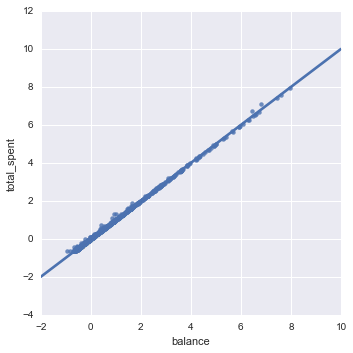

In [317]:
# Create an enhanced scatter plot of the features 'balance' vs. 'total_spent'
ax = sns.lmplot(x='balance', y='total_spent', data=customer_summary_clean, fit_reg=True)
plt.show()


### Bonus Activity - Try different combinations of the input features in a grid/scatterplot matrix

A scatterplot matrix shows a grid of scatterplots where each attribute is plotted against all other attributes. You can find further information on how to create a scatterplot matrix with seaborn using the pairplot() function at https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html. 

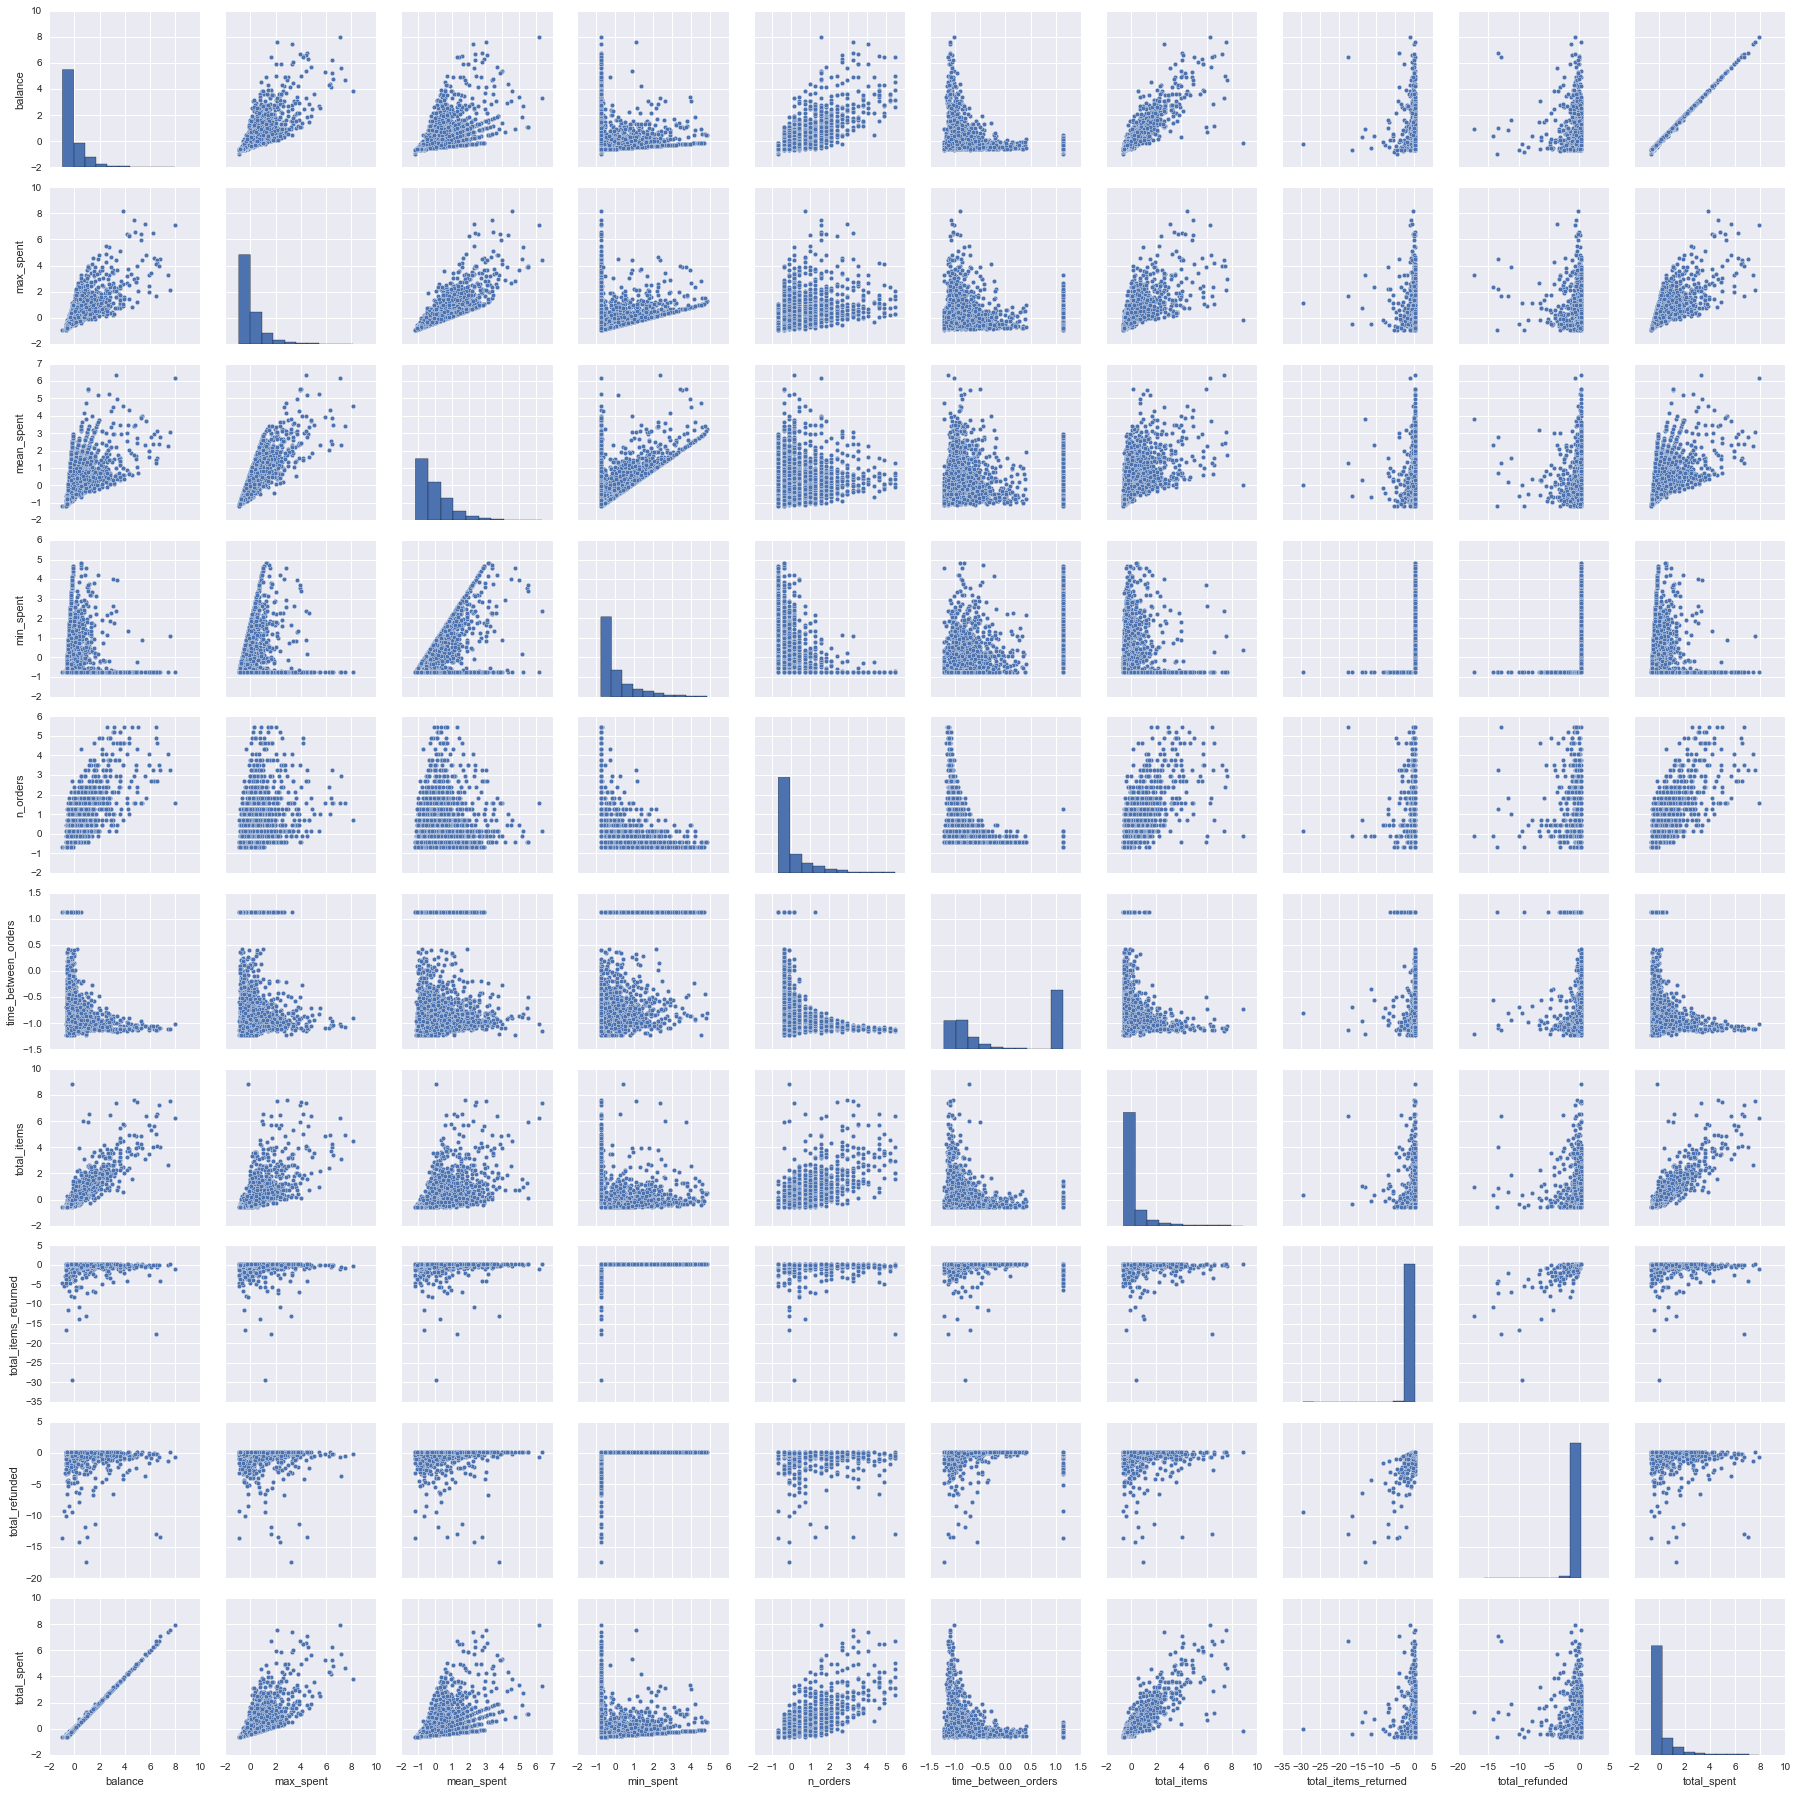

In [297]:
# Create a scatterplot matrix 

ax = sns.pairplot(customer_summary_clean)
plt.show()

### Learning Activity - Create a correlation matrix and heatmap of correlations between the input features

It is often of great interest to investigate whether any of the variables in a multivariate dataset are significantly correlated. As we previously demonstrated, the different features (variables) in `customers` are not completely independent from each other. To quickly identify which features are related and to
what degree, it is useful to to calculate a correlation matrix that shows the correlation coefficient for each pair of variables. You can do this by using the `corr()` function from the `pandas` library:

In [298]:
# Calculate the correlation coefficients
corrmat = customer_summary_clean.corr()

To search for linear relationships between features across all pairs of features, you can use a heatmap
of correlations, which is simply a matrix of subplots whose colours represent the
degree of the correlations:

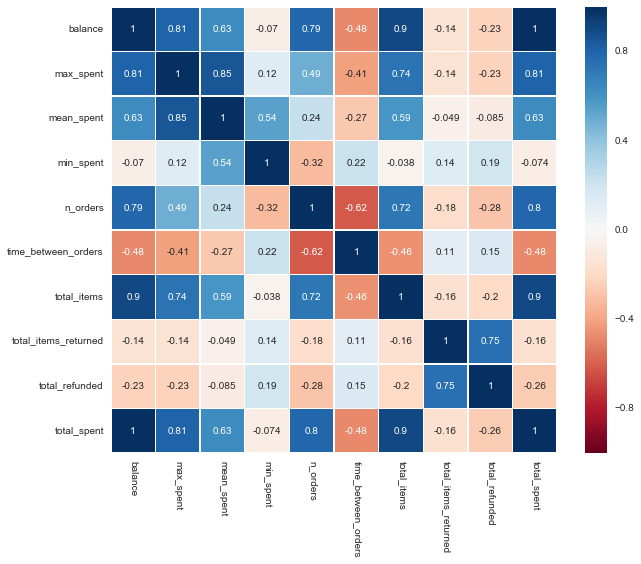

In [332]:
# Create a heatmap of the correlation coefficients
f, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corrmat, linewidths=0.5, cmap="RdBu",vmin=-1, vmax=1, annot=True)
plt.xticks(rotation=270)
plt.show()

## Learning Activity: Mapping Categorical Features

As previously mentioned, most machine learning libraries and tools will only accept numerical values as their input. In the case where we have categorical features present, we need to represent them as numerical values. Unlike the label encoding we demonstrated previously for the class vector, when dealing with categorical input features, typically one converts each categorical feature using “one-hot encoding”. The input in one-hot encoding is the vector of discrete categorical values, and the output will be a sparse matrix where each column corresponds to one possible value of one feature.

In our example, the feature Country is a categorical feature with values such as ["Finland", "Norway", "Spain"] etc. Such features can be easily mapped to dummy variables which could be expressed as [0, 1, 2]. Can you spot any problem though with this approach? Even though the country values do not come in any particular order, a machine learning algorithm will now assume that "Spain" is larger than "Norway", and "Norway" is larger than "Finland", and so on. Although this assumption is incorrect, the algorithm could still produce useful results. However, those results would not be optimal.  

The correct approach in this case is to apply one-hot encoding. This estimator transforms each unique categorical value of a single input categorical feature to a new dummy **feature**. So, for our 11 unique country values, we will end up with 10 new dummy features after one-hot-encoding. 

There are plenty of libraries and functions that are used for one-hot encoding. In this example, we will use the `get_dummies()` function from `pandas`: 

In [333]:
# Apply one-hot encoding to the categorical feature Country
countries = customer_summary_clean.reset_index('Country')
countries = countries['Country']
countries = pd.get_dummies(countries)
countries.head()

,Austria,Belgium,Finland,France,Germany,Italy,Norway,Portugal,Spain,Switzerland,United Kingdom
CustomerID,,,,,,,,,,,
12348,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12350,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
12352,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
12354,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
12356,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


At this stage, we want to update in our *customers* and *X* Dataframes the categorical feature "Country" with the result of one-hot encoding. Remember, that are going to remove a single feature, and add 11 new dummy variables created by one-hot encoding. 

In [334]:
# Remove and replace the Country values from customers with the result of one-hot encoding
customer_summary_clean = customer_summary_clean.join(countries)

customer_summary_clean.head()

,,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent,...,Belgium,Finland,France,Germany,Italy,Norway,Portugal,Spain,Switzerland,United Kingdom
CustomerID,Country,,,,,,,,,,,,,,,,,,,,,
12348,Finland,0.38,1.25,1.43,0.51,-0.13,-0.87,2.26,0.18,0.25,0.38,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12350,Norway,-0.56,-0.64,-0.57,0.02,-0.70,1.14,-0.52,0.18,0.25,-0.56,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
12352,Norway,-0.15,0.10,-0.37,-0.76,0.43,-1.15,-0.28,-1.05,-1.15,-0.12,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
12354,Spain,-0.35,0.12,1.01,2.11,-0.70,1.14,-0.38,0.18,0.25,-0.35,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
12356,Portugal,1.10,3.92,5.49,3.53,-0.42,-0.70,1.25,0.18,0.25,1.09,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


## Module 3

The amount of data generated each day has been growing exponentially over the past years. This may result in the generation of a large number of input features, a subset of which may be highly correlated, repetitive, not very informative or even related to the particular study. Datasets with a large number of features are commonly referred to as high-dimensional datasets.

In this module, we will investigate Principal Component Analysis (PCA) as a technique for dimensionality reduction, data compression and feature extraction. The PCA algorithm reduces the initial number of possibly correlated variables into a new lower number of uncorrelated (orthogonal) variables, known as the Principal Components (PCs). PCA is commonly applied prior to unsupervised and supervised machine learning models to reduce the number of features used in the analysis, thereby reducing the likelihood of error.


## Principal Component Analysis 

Principal Component Analysis (PCA) is the most commonly used technique for dimensionality reduction, data compression and feature extraction. The PCA algorithm reduces the initial number of possibly correlated variables into a new lower number of uncorrelated variables, more specifically in a set of successive orthogonal components that explain a maximum amount of the variance, known as the Principal Components (PCs). 

### Learning Activity - Apply PCA in the input data using scikit-learn

In scikit-learn, PCA is implemented as a transformer object that learns _n_ components in its `fit()` method, and can be used on new data to project it on these components. More information on how to use the `pca()` function and its parameters can be found at http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


In [339]:
# Initialise the PCA object and create an index for each Principal Component



pca = PCA()
ind = ['PC'+str(i+1) for i in range(customer_summary_clean.shape[1])]

The values of the Principal Components (scores) can be computed by the `fit_transform()` (alternatively, `fit()` followed by the `transform()`) function. This function returns a matrix with the principal components, where the first column in the matrix contains the first principal component, the second column the second component, and so on.

In [340]:
# Create the PCA scores matrix and check the dimensionality of the PCA scores

scores = pca.fit_transform(customer_summary_clean)
scores = pd.DataFrame(scores, columns = ind, index = customers2.index)
print(scores.shape)

(3126, 21)


The loadings for the principal components are stored in a named element *components_*. This contains a matrix with the loadings of each principal component, where the first column in the matrix contains the loadings for the first principal component, the second column contains the loadings for the second principal component, and so on. 

In [341]:
# Create the PCA loadings matrix and check the dimensionality of the PCA loadings
loadings = pca.components_
loadings = pd.DataFrame(loadings, columns=customer_summary_clean.columns, index = ind)

print(loadings.shape)

(21, 21)


### Learning Activity: Calculate and plot the explained and cumulative variance 

But how much information have we lost? We can figure this out by looking at the explained and cumulative variance. The explained variance gives us the proportion of variance explained by each successive Principal Component. The cumulative variance  is obtained by adding the successive proportions of explained variance to obtain the total sum.

In [342]:
# Calculate the explained and cumulative variance


# Calculate the explained variance
exp_var = [i*100 for i in pca.explained_variance_ratio_]

# Calculate the cumulative variance
cum_var = np.cumsum(pca.explained_variance_ratio_*100)

# Combine both in a data frame
pca_var = pd.DataFrame(data={'exp_var': exp_var, 'cum_var': cum_var},index=ind)
pca_var

,cum_var,exp_var
PC1,50.52,50.52
PC2,69.34,18.82
PC3,83.33,14.00
PC4,89.55,6.22
PC5,93.43,3.88
PC6,95.93,2.51
PC7,97.42,1.49
PC8,98.28,0.86
PC9,99.06,0.78
PC10,99.45,0.39


We can also plot the explained variance using a barplot with seaborn:

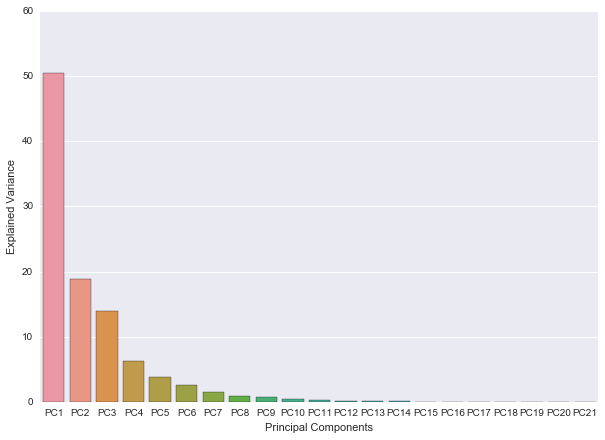

In [344]:
# Plot the explained variance per PC using a barplot
fig = plt.figure(figsize=(10,7))

ax = sns.barplot(x=pca_var.index, y='exp_var', data=pca_var)
ax.set(xlabel='Principal Components', ylabel='Explained Variance')
plt.show()

### Bonus Activity - Plot the cumulative variance

Plot the cumulative variance using a line plot, screeplot or barplot:

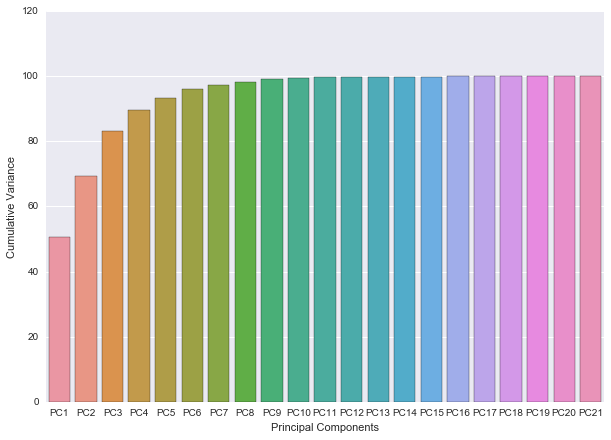

In [348]:
# Plot the cumulative variance per PC using a barplot
fig = plt.figure(figsize=(10,7))

ax = sns.barplot(x=pca_var.index, y='cum_var', data=pca_var)
ax.set(xlabel='Principal Components', ylabel='Cumulative Variance')
plt.show()

### Learning Activity - Plot the PCA loadings using a heatmap

Each Principal Component is a linear combination of all the variables and is perpendicular to every other component. Each variable in each component is multiplied by set of factors, the loading factors, which transforms the original data into this new component space. These loading factors serve as weights to see which parameters are most important for a particular principal component.


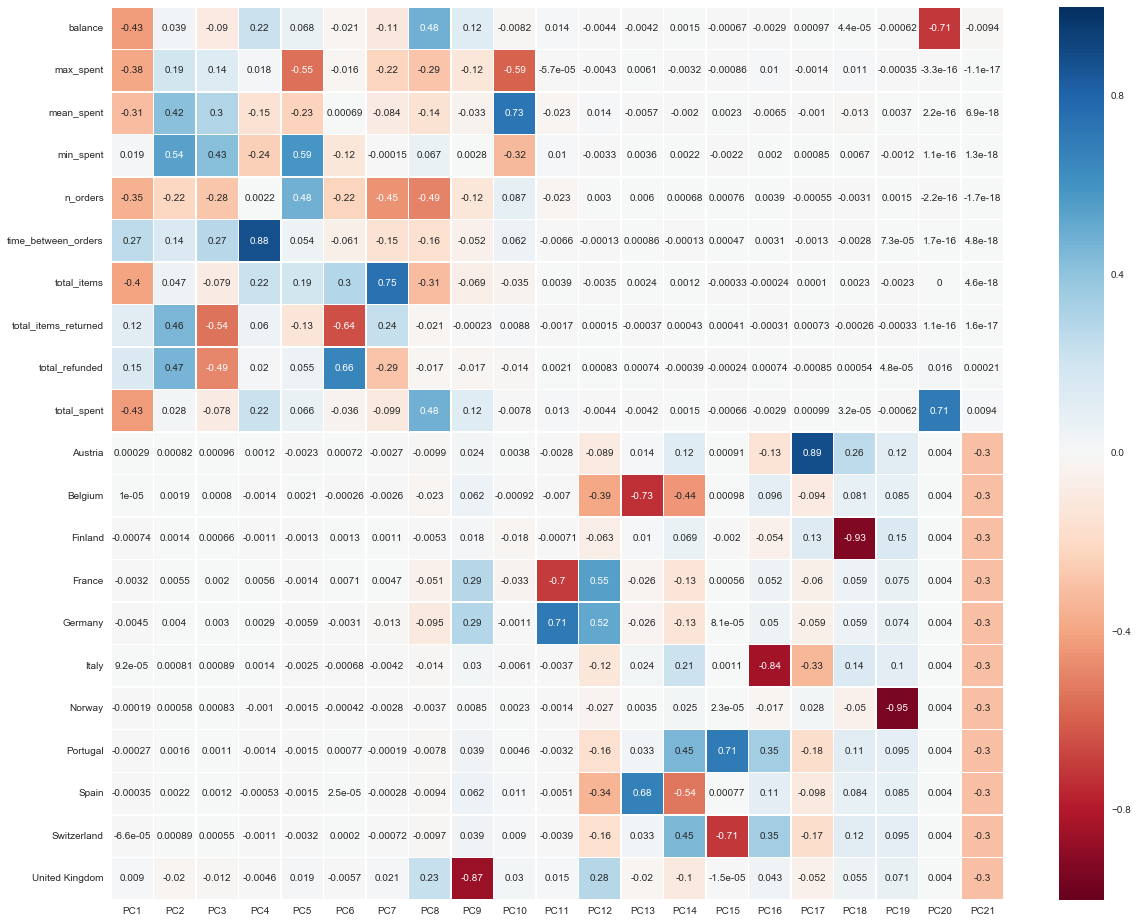

In [349]:
# Plot the PCA loadings in a heatmap
f, ax = plt.subplots(figsize=(20,16))

ax = sns.heatmap(loadings.transpose(), linewidths=0.5, cmap="RdBu", vmin=-1, vmax=1, annot=True)

plt.show()



We can use this heatmap to see how the different features load onto the different components. For example, PC1 seems to be concerned mainly with volume of purchase (hence the heavy loadings of the item quantity and spending amounts), while PC 3 seems to be mainly concerned with the total refunded. In real life scenarios, these components can often be attributed to higher level concepts with respect to the features (e.g. length, breadth, height might form a "size" component) or domain-specific constructs. 

### Learning Activity - Create a scatterplot of the first two PCs

Often PCA scores plots are used in the hope that they will reveal clusters, trends and patterns in the data.
So, let us start by creating a scatterplot of the first two principal components (scores of PC1 and PC2):

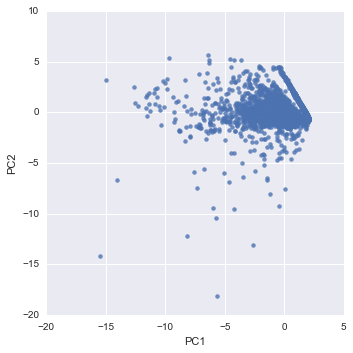

In [351]:
# Create a scatterplot of the first two Principal Components
# Remember, we will use scores (!) rather than customers as input

ax = sns.lmplot(x='PC1', y='PC2', data=scores, fit_reg=False)
plt.show()

### Test Activity - Reading in the associated classes 

At this stage, we will import and join per row with the `customers` DataFrame the associated classes in order to use this knowledge during visualisation. Try to import the customer classes from the provided "`customer_classes.csv`" into the variable **_y_**. Remember to also define the column that will be used as the row labels of the DataFrame as in the previous step (if you are unsure, open the csv file and try to decide the column name you are going to use). 

In this case, the class **_y_** contains two classes (binary case) - "yes" vs. "no" - that represent the returning and non-returning customers respectively.

In [352]:
# Import the data from the customer_classes.csv, set the index column and explore the first few rows
y = pd.read_csv('data/customer_classes.csv', index_col='CustomerID')
y.head()

,class
CustomerID,
12348,yes
12350,no
12352,yes
12354,no
12356,yes


Remember to check the dimensionality of your input data:

In [353]:
# Check the dimensionality of y
print(y.shape)

(3126, 1)


### Learning Activity - Joining with class

A very useful feature of `pandas` is its `join()` function, which allows combining tables based on one column shared between tables. Here we use `join()` to combine the input features and information on whether customers return (associated classes).

You will join the class labels with the dataset by a shared index. **`CustomerID`** is the obvious choice here, as it is the only column shared between the two DataFrames.

In [355]:
# Join the "customers" and y DataFrames based on the common CustomerIDs
customers_enhanced = customer_summary_clean.join(y)
customers_enhanced.head()


,,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
CustomerID,Country,,,,,,,,,,,,,,,,,,,,,
12348,Finland,-2.27,1.37,0.18,-0.39,-0.38,0.71,1.36,-0.88,0.60,-0.05,...,-0.34,0.03,0.17,-0.00,-0.10,0.18,-0.97,0.08,0.00,0.00
12350,Norway,1.70,0.12,0.18,0.72,0.03,0.03,0.00,-0.17,0.82,-0.04,...,-0.31,0.02,0.13,0.00,-0.06,0.08,-0.11,-1.02,0.00,0.00
12352,Norway,-0.47,-1.82,0.33,-0.97,-0.29,-0.09,-0.13,-0.27,0.81,-0.12,...,-0.31,0.02,0.12,0.00,-0.06,0.08,-0.10,-1.02,-0.00,-0.00
12354,Spain,0.74,2.07,1.61,0.13,0.52,-0.20,-0.23,-0.32,0.77,-0.01,...,-0.61,0.70,-0.44,-0.00,0.07,-0.05,0.03,0.02,0.00,0.00
12356,Portugal,-4.54,5.28,3.15,-1.42,-1.26,0.02,-0.37,-0.92,0.43,0.41,...,-0.41,0.05,0.54,0.70,0.31,-0.13,0.06,0.03,-0.00,0.00


In [356]:
# Join the "scores" (PCA) and y DataFrames based on the common CustomerIDs

scores_enhanced = scores.join(y)


,,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,class
CustomerID,Country,,,,,,,,,,,,,,,,,,,,,
12348,Finland,-2.27,1.37,0.18,-0.39,-0.38,0.71,1.36,-0.88,0.60,-0.05,...,0.03,0.17,-0.00,-0.10,0.18,-0.97,0.08,0.00,0.00,yes
12350,Norway,1.70,0.12,0.18,0.72,0.03,0.03,0.00,-0.17,0.82,-0.04,...,0.02,0.13,0.00,-0.06,0.08,-0.11,-1.02,0.00,0.00,no
12352,Norway,-0.47,-1.82,0.33,-0.97,-0.29,-0.09,-0.13,-0.27,0.81,-0.12,...,0.02,0.12,0.00,-0.06,0.08,-0.10,-1.02,-0.00,-0.00,yes
12354,Spain,0.74,2.07,1.61,0.13,0.52,-0.20,-0.23,-0.32,0.77,-0.01,...,0.70,-0.44,-0.00,0.07,-0.05,0.03,0.02,0.00,0.00,no
12356,Portugal,-4.54,5.28,3.15,-1.42,-1.26,0.02,-0.37,-0.92,0.43,0.41,...,0.05,0.54,0.70,0.31,-0.13,0.06,0.03,-0.00,0.00,yes


### Learning Activity: Create enhanced PCA scores plot

It is often quite useful to create a scatterplot of the first two principal components (Xscores of PC1 and PC2), colour the observations based on their associated class labels, and see whether we can detect any patterns or well-defined clusters. 

Create an enhanced graph of the first two PCs, but this time use as plotting data the `scores_enhanced` dataset: 

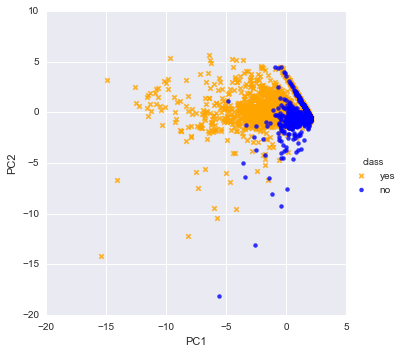

In [357]:
# Create an enhanced scatterplot of the first two Principal Components
# Remember, we are using scores_enhanced (!) 

ax = sns.lmplot(x='PC1', y='PC2', data= scores_enhanced, hue='class', markers=['x','o'],
               palette=['orange', 'blue'], fit_reg=False)
plt.show()

The scatterplot shows PC1 (1st Principal Component) on the x-axis, and PC2 (2nd Principal Component) on the y-axis. Based on this plot, we can see that the observations of the two classes are highly overlapping in 2D space, therefore, it may be interesting to investigate the first 3 PCs using a 3D scatterplot. 

### Bonus Activity: Create a 3D PCA scores plot using seaborn or Plotly

We may want to investigate simultaneously the first three Principal Components (PCs) using seaborn or Plotly. *Hint* you may need to use a for loop to iterate through each of the available classes while building the scatterplot. 

In [ ]:
# Create a 3D scatterplot of the first three Principal Components 

### Learning Activity - Export to csv

Now that we have produced the datasets that are ready for applying some machine learning algorithms we will save (or "export") them to our local machine and working repository. This also served as a checkpoint for the bootcamp so that you can get started straight away with the next module even if you got stuck with some part above.

Writing a `pd.Dataframe` to disk is very easy - you just use the `.to_csv()` method, and specify the file path to where you want it saved. There also other [formats](http://pandas.pydata.org/pandas-docs/stable/api.html#id12) that you save to, which are based on functions that work in exactly the same way.

In [ ]:
## Save to a csv file with the '.to_csv()' method and give the file a name you want

## END OF DAY 1